## Group 3 Assignment

### Anastasia Chapel, Clara Sobejano, Manuel Bonnelly, Pablo Gallegos, Yousef Joukhdar

In [8]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])

import math
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import_or_install('pingouin') # We need this library to have our normality test graph
import pingouin as pg
import statistics as sta

path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'
df = pd.read_csv(path+'Housing1.csv')
print(df.head())


     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  4473000  3162         3          1        2      yes        no       no   
1  4613000  4510         4          2        2      yes        no      yes   
2  5950000  6420         3          1        1      yes        no      yes   
3  3118850  2398         3          1        1      yes        no       no   
4  4200000  2953         3          1        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        1       no        furnished  
1              no              no        0       no   semi-furnished  
2              no             yes        0      yes        furnished  
3              no              no        0      yes   semi-furnished  
4              no             yes        0       no      unfurnished  


## Analyse the full dataset:

*   Describe the nature of each variable: numerical, categorical, ordinal.



In [10]:

print('\nprice is a numerical continuous variable that indicates the price of the house')
print('\narea is a numerical continuous variable that indicates the size of the property.')
print('\nbedrooms is a numerical discrete variable that indicates the number of bedrooms in the house.')
print('\nbathrooms is a numerical discrete variable that indicates the number of bathrooms in the house.')
print('\nstories is a numerical discrete variable that indicates the number of floors in the property.')
print('\nmainroad is a boolean variable that indicates if the property is connected to a mainroad.')
print('\nguestroom is a boolean variable that indicates if the property has a guestroom.')
print('\nbasement is a boolean variable that indicates if the property has a basement.')
print('\nhotwaterheating is a boolean variable that indicates if the property has a water heating system.')
print('\nairconditioning is a boolean variable that indicates if the property has an air conditioning device.')
print('\nparking is a discrete variable that indicates the number of vehicle parking slots the house has.')
print('\nprefarea is a boolean variable that indicates if the property is located in the preferred neighbourhood of the city.')
print('\nfurnishingstatus is a categorical variable that indicates the furnishing status of the house.')



price is a numerical continuous variable that indicates the price of the house

area is a numerical continuous variable that indicates the size of the property.

bedrooms is a numerical discrete variable that indicates the number of bedrooms in the house.

bathrooms is a numerical discrete variable that indicates the number of bathrooms in the house.

stories is a numerical discrete variable that indicates the number of floors in the property.

mainroad is a boolean variable that indicates if the property is connected to a mainroad.

guestroom is a boolean variable that indicates if the property has a guestroom.

basement is a boolean variable that indicates if the property has a basement.

hotwaterheating is a boolean variable that indicates if the property has a water heating system.

airconditioning is a boolean variable that indicates if the property has an air conditioning device.

parking is a discrete variable that indicates the number of vehicle parking slots the house has.

p

## Analyse the full dataset:

*   Add the main statistics depending on the nature of each variable:  mean, median, mode, sd, IQR, quartiles, range

In [19]:

print('\n\n')
def print_stats(df,variable):
  print(f'Main statistics of variable {variable}')
  print('Mean:',"{:,.2f}".format(df[variable].mean()))
  print('Median:',"{:,.2f}".format(sta.median(df[variable])))
  print('Mode:',"{:,.2f}".format(sta.mode(df[variable])))
  print('SD:',"{:,.2f}".format(df[variable].std()))
  print('Min:',"{:,.2f}".format(df[variable].min()))
  print('Q1:',"{:,.2f}".format(np.percentile(df[variable], 25)))
  print('Q2:',"{:,.2f}".format(np.percentile(df[variable], 50)))
  print('Q3:',"{:,.2f}".format(np.percentile(df[variable], 75)))
  print('Q4/Max:',"{:,.2f}".format(np.percentile(df[variable], 100)))
  print('IQR:', "{:,.2f}".format(np.percentile(df[variable], 75) - np.percentile(df[variable], 25)))
  print('Range:',"{:,.2f}".format(max(df[variable])-min(df[variable])))

print_stats(df,'price')
print('\n')
print_stats(df,'area')
print('\n')
print_stats(df,'bathrooms')
print('\n')
print_stats(df,'stories')
print('\n')
print_stats(df,'parking')
print('\n')
print_stats(df,'bedrooms')




Main statistics of variable price
Mean: 4,878,074.82
Median: 4,357,500.00
Mode: 4,200,000.00
SD: 1,946,797.23
Min: 1,750,000.00
Q1: 3,500,000.00
Q2: 4,357,500.00
Q3: 5,950,000.00
Q4/Max: 12,250,000.00
IQR: 2,450,000.00
Range: 10,500,000.00


Main statistics of variable area
Mean: 5,319.04
Median: 4,935.00
Mode: 6,000.00
SD: 2,257.28
Min: 1,836.00
Q1: 3,600.00
Q2: 4,935.00
Q3: 6,457.50
Q4/Max: 16,200.00
IQR: 2,857.50
Range: 14,364.00


Main statistics of variable bathrooms
Mean: 1.31
Median: 1.00
Mode: 1.00
SD: 0.52
Min: 1.00
Q1: 1.00
Q2: 1.00
Q3: 2.00
Q4/Max: 4.00
IQR: 1.00
Range: 3.00


Main statistics of variable stories
Mean: 1.86
Median: 2.00
Mode: 2.00
SD: 0.91
Min: 1.00
Q1: 1.00
Q2: 2.00
Q3: 2.00
Q4/Max: 4.00
IQR: 1.00
Range: 3.00


Main statistics of variable parking
Mean: 0.67
Median: 0.00
Mode: 0.00
SD: 0.86
Min: 0.00
Q1: 0.00
Q2: 0.00
Q3: 1.00
Q4/Max: 3.00
IQR: 1.00
Range: 3.00


Main statistics of variable bedrooms
Mean: 3.00
Median: 3.00
Mode: 3.00
SD: 0.78
Min: 1.00
Q1:

In [ ]:
print('There are ',df['mainroad'].value_counts()['yes'], ' houses connected to the mainroad.\n')
print('There are ',df['guestroom'].value_counts()['yes'], ' houses that have a guestroom.\n')
print('There are ',df['basement'].value_counts()['yes'], ' houses that have a basement.\n')
print('There are ',df['hotwaterheating'].value_counts()['yes'], ' houses with a water heating system.\n')
print('There are ',df['airconditioning'].value_counts()['yes'], ' houses with an air conditioning system.\n')
print('There are ',df['prefarea'].value_counts()['yes'], ' houses in the preferred neighborhood.\n')
print('There are ',df['furnishingstatus'].value_counts()['furnished'], ' furnished houses,',
    df['furnishingstatus'].value_counts()['semi-furnished'],' partially furnished houses, and ',
    df['furnishingstatus'].value_counts()['unfurnished'], ' unfurnished houses.')

There are  238  houses connected to the mainroad.

There are  47  houses that have a guestroom.

There are  95  houses that have a basement.

There are  17  houses with a water heating system.

There are  78  houses with an air conditioning system.

There are  70  houses in the preferred neighborhood.

There are  75  furnished houses, 109  partially furnished houses, and  88  unfurnished houses.


## Analyse the full dataset:

*   Create a histogram for each variable.

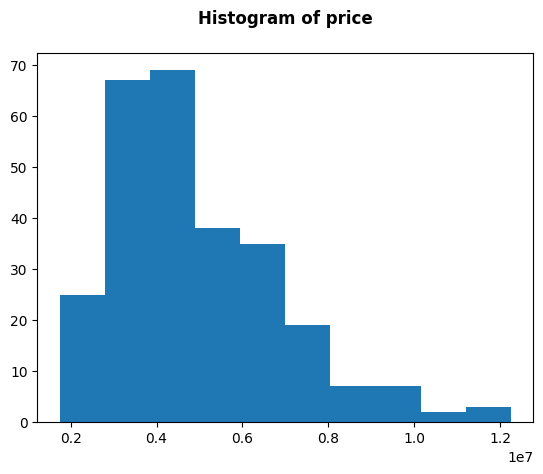

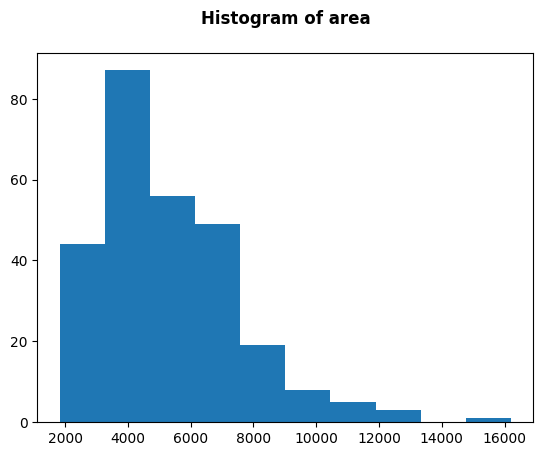

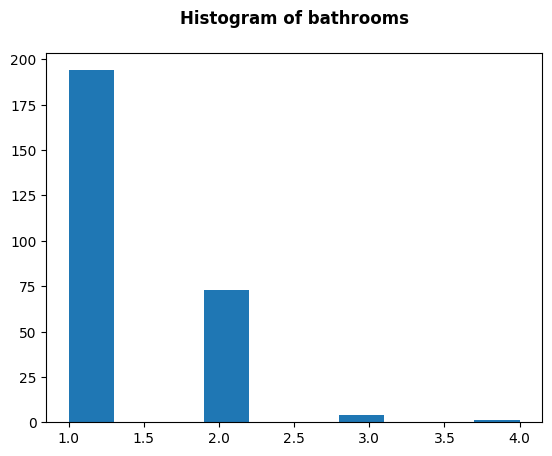

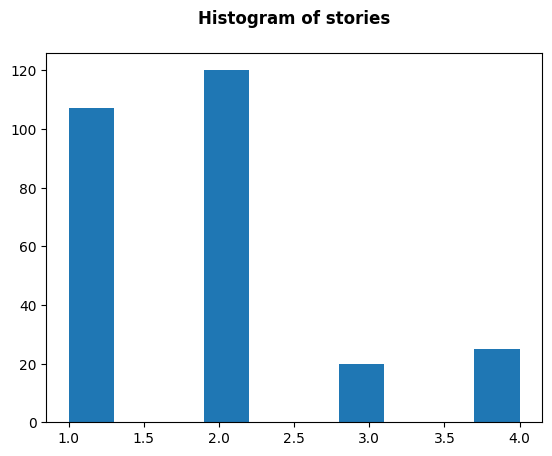

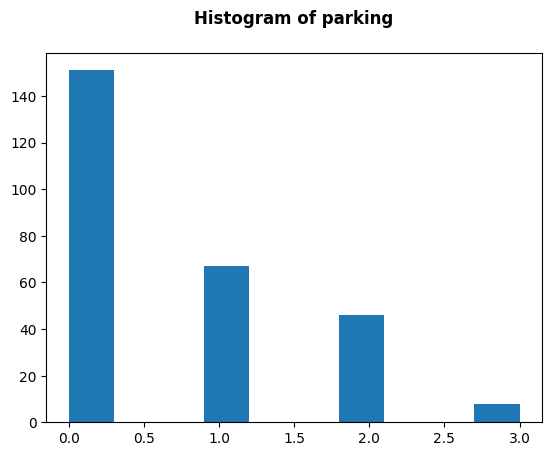

In [12]:
plt.title('Histogram of price\n',
          fontweight = "bold")
plt.show(plt.hist(df['price']))

plt.title('Histogram of area\n',
          fontweight = "bold")
plt.show(plt.hist(df['area']))

plt.title('Histogram of bathrooms\n',
          fontweight = "bold")
plt.show(plt.hist(df['bathrooms']))

plt.title('Histogram of stories\n',
          fontweight = "bold")
plt.show(plt.hist(df['stories']))

plt.title('Histogram of parking\n',
          fontweight = "bold")
plt.show(plt.hist(df['parking']))


## Analyse the full dataset:
*   Create a piechart if the variable is binary.

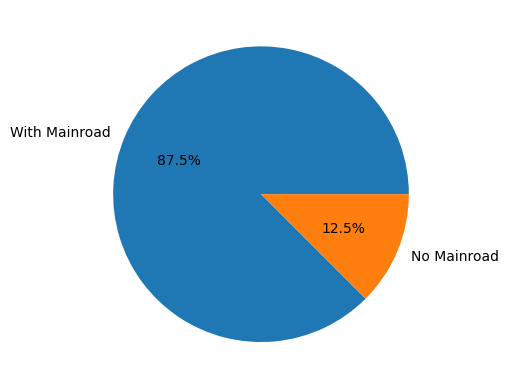

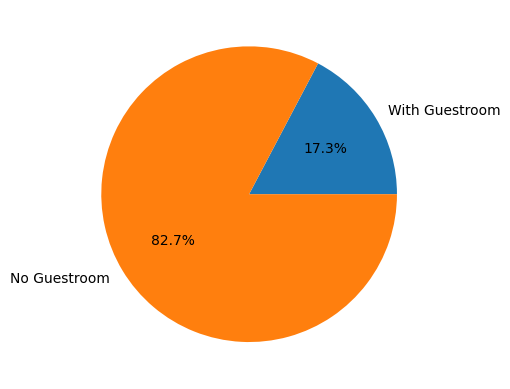

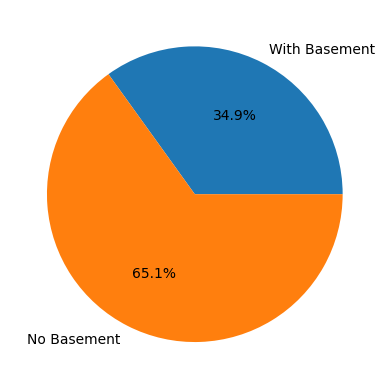

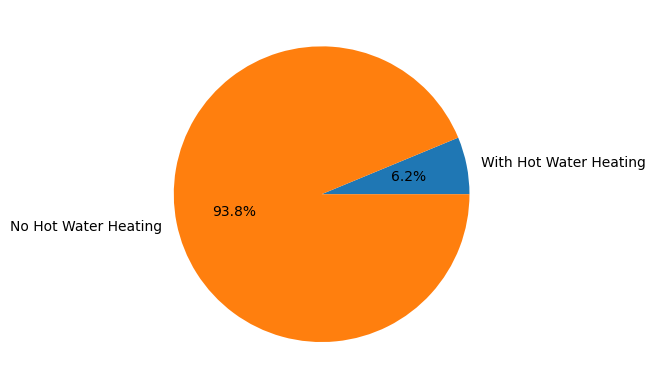

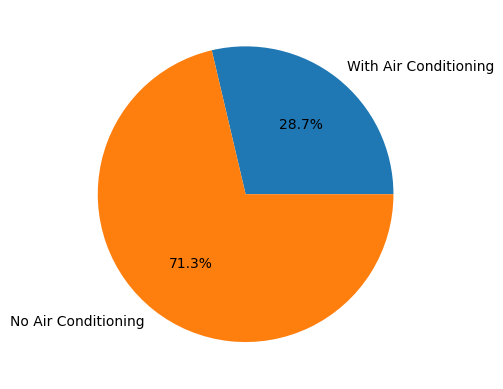

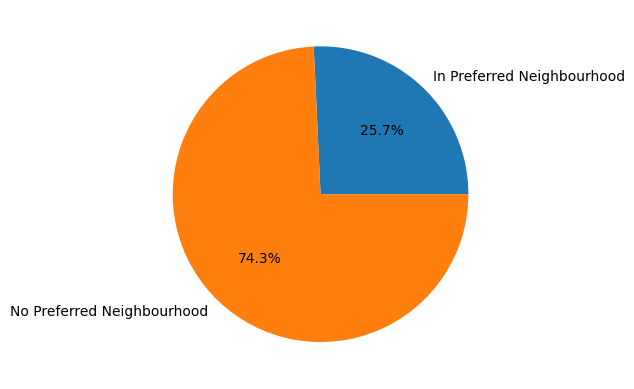

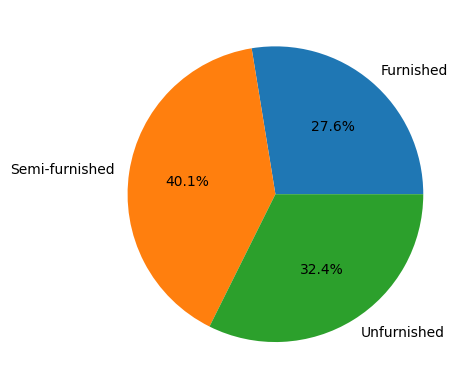

In [13]:
houses_with_mainroad = len(df[(df['mainroad']== 'yes')])
houses_without_mainroad = 272 - houses_with_mainroad

fig, ax = plt.subplots()
ax.pie([houses_with_mainroad, houses_without_mainroad], labels=['With Mainroad', 'No Mainroad'], autopct='%1.1f%%')
plt.show()

houses_with_guestroom = len(df[(df['guestroom']== 'yes')])
houses_without_guestroom = 272 - houses_with_guestroom

fig, ax = plt.subplots()
ax.pie([houses_with_guestroom, houses_without_guestroom], labels=['With Guestroom', 'No Guestroom'], autopct='%1.1f%%')
plt.show()

houses_with_basement = len(df[(df['basement']== 'yes')])
houses_without_basement = 272 - houses_with_basement

fig, ax = plt.subplots()
ax.pie([houses_with_basement, houses_without_basement], labels=['With Basement', 'No Basement'], autopct='%1.1f%%')
plt.show()

houses_with_hotwaterheating = len(df[(df['hotwaterheating']== 'yes')])
houses_without_hotwaterheating = 272 - houses_with_hotwaterheating

fig, ax = plt.subplots()
ax.pie([houses_with_hotwaterheating, houses_without_hotwaterheating], labels=['With Hot Water Heating', 'No Hot Water Heating'], autopct='%1.1f%%')
plt.show()


houses_with_airconditioning = len(df[(df['airconditioning']== 'yes')])
houses_without_airconditioning = 272 - houses_with_airconditioning

fig, ax = plt.subplots()
ax.pie([houses_with_airconditioning, houses_without_airconditioning], labels=['With Air Conditioning', 'No Air Conditioning'], autopct='%1.1f%%')
plt.show()

houses_with_prefarea = len(df[(df['prefarea']== 'yes')])
houses_without_prefarea = 272 - houses_with_prefarea

fig, ax = plt.subplots()
ax.pie([houses_with_prefarea, houses_without_prefarea], labels=['In Preferred Neighbourhood', 'No Preferred Neighbourhood'], autopct='%1.1f%%')
plt.show()

houses_furnished = len(df[(df['furnishingstatus']== 'furnished')])
houses_semifurnished = len(df[(df['furnishingstatus']== 'semi-furnished')])
houses_unfurnished = len(df[(df['furnishingstatus']== 'unfurnished')])

fig, ax = plt.subplots()
ax.pie([houses_furnished, houses_semifurnished, houses_unfurnished], labels=['Furnished', 'Semi-furnished','Unfurnished'], autopct='%1.1f%%')
plt.show()

## Suppose that your dataset is a full population (only for this bulletpoint):
*   Calculate the minimum sample size needed and create a new dataset with this sample size.

In [14]:
N = 272 # Population size
CL = 0.95 # Confidence level
p = 0.5 # Standard Deviation. If unknown, leave it as 0.5
e = 0.05 # Margin of error

alpha_half = (1-CL)/2
Z_score = st.norm.ppf(alpha_half+CL)

n = ((Z_score**2)*p*(1-p))/e**2
sample_size = n/(1+(((Z_score**2)*p*(1-p))/((e**2)*N))) # Sample size for a limited population
print(f'Sample size needed is {"{:,.2f}".format(sample_size)}, which must be rounded up to 160.\n\n')

sample_houses = df.sample(n=160)

print(sample_houses.head())

Sample size needed is 159.24, which must be rounded up to 160.


       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
167  4270000  4360         4          1        2      yes        no       no   
194  3325000  4775         4          1        2      yes        no       no   
57   5530000  6100         3          2        1      yes        no      yes   
43   7420000  6325         3          1        4      yes        no       no   
173  1750000  2910         3          1        1       no        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
167              no              no        0       no        furnished  
194              no              no        0       no      unfurnished  
57               no              no        2      yes        furnished  
43               no             yes        1       no      unfurnished  
173              no              no        0       no        furnished  


## Suppose that your dataset is a full population (only for this bulletpoint):
* Compare the mean of the sample with the population and see if the population fall within the defined confidence interval:

**We will calculate the sample mean for price, area and bedrooms. Then, will check if the population mean of every variable falls within its confidence interval.**

In [15]:
mean_sample_price = sta.mean(sample_houses['price'])
sd_sample_price = sta.stdev(sample_houses['price'])
mean_sample_area = sta.mean(sample_houses['area'])
sd_sample_area = sta.stdev(sample_houses['area'])
mean_sample_bedrooms = sta.mean(sample_houses['bedrooms'])
sd_sample_bedrooms = sta.stdev(sample_houses['bedrooms'])

## Z-score for two tailed 95% confidence level:
z = st.norm.ppf(0.975)

ci_price_from = mean_sample_price-z*(sd_sample_price/math.sqrt(n))
ci_price_to = mean_sample_price+z*(sd_sample_price/math.sqrt(n))

ci_price_from = "{:,.2f}".format(ci_price_from)
ci_price_to = "{:,.2f}".format(ci_price_to)

mean_price = sta.mean(df['price'])
mean_price = "{:,.2f}".format(mean_price)


##Confidence interval for mean of sample price:
print(f'Confidence interval of mean price from {ci_price_from} to {ci_price_to}, compared to a population mean of {mean_price}.')

ci_area_from = mean_sample_area-z*(sd_sample_area/math.sqrt(n))
ci_area_to = mean_sample_area+z*(sd_sample_area/math.sqrt(n))

ci_area_from = "{:,.2f}".format(ci_area_from)
ci_area_to = "{:,.2f}".format(ci_area_to)

mean_area = sta.mean(df['area'])
mean_area = "{:,.2f}".format(mean_area)

##Confidence interval for mean of sample area:
print(f'Confidence interval of mean area from {ci_area_from} to {ci_area_to}, compared to a population mean of {mean_area}.')

ci_bedrooms_from = mean_sample_bedrooms-z*(sd_sample_bedrooms/math.sqrt(n))
ci_bedrooms_to = mean_sample_bedrooms+z*(sd_sample_bedrooms/math.sqrt(n))

ci_bedrooms_from = "{:,.2f}".format(ci_bedrooms_from)
ci_bedrooms_to = "{:,.2f}".format(ci_bedrooms_to)

mean_bedrooms = sta.mean(df['bedrooms'])
mean_bedrooms = "{:,.2f}".format(mean_bedrooms)

##Confidence interval for mean of sample bedrooms:
print(f'Confidence interval of mean bedrooms from {ci_bedrooms_from} to {ci_bedrooms_to}, compared to a population mean of {mean_bedrooms}.')


Confidence interval of mean price from 4,701,702.08 to 5,106,746.05, compared to a population mean of 4,878,074.82.
Confidence interval of mean area from 5,156.11 to 5,639.98, compared to a population mean of 5,319.04.
Confidence interval of mean bedrooms from 2.96 to 3.12, compared to a population mean of 3.00.


## With the full dataset, perform hypothesis testing for determined variables based on your group:
### **price vs parking**
##### Hypothesis testing: high price (higher than the median) and lower than the median price.

In [14]:
# price vs parking median. parking goes from 0 to 3.

w = df['price'][(df['parking'] == 0)]
x = df['price'][(df['parking'] == 1)]
y = df['price'][(df['parking'] == 2)]
z = df['price'][(df['parking'] == 3)]

median = df['price'].median()

print(f"N of items above the median for 0 parking: {len([i for i in w if i > median])}")
print(f"N of items below or equal to the median for 0 parking: {len([i for i in w if i <= median])}")

print(f"N of items above the median for 1 parking: {len([i for i in x if i > median])}")
print(f"N of items below or equal to the median for 1 parking: {len([i for i in x if i <= median])}")

print(f"N of items above the median for 1 parking: {len([i for i in y if i > median])}")
print(f"N of items below or equal to the median for 1 parking: {len([i for i in y if i <= median])}")

print(f"N of items above the median for 1 parking: {len([i for i in z if i > median])}")
print(f"N of items below or equal to the median for 1 parking: {len([i for i in z if i <= median])}")

cont_table = st.median_test(w, x, y, z).table

print('\nContingency table:\n',cont_table)

chi2_test = st.chi2_contingency(cont_table)
print('\n',chi2_test)
print(f'With a p-value of {"{:,.8f}".format(st.chi2_contingency(cont_table).pvalue)}, we reject the null hypothesis of same proportions of price based on number of parking.')

N of items above the median for 0 parking: 60
N of items below or equal to the median for 0 parking: 91
N of items above the median for 1 parking: 39
N of items below or equal to the median for 1 parking: 28
N of items above the median for 1 parking: 34
N of items below or equal to the median for 1 parking: 12
N of items above the median for 1 parking: 3
N of items below or equal to the median for 1 parking: 5

Contingency table:
 [[60 39 34  3]
 [91 28 12  5]]

 Chi2ContingencyResult(statistic=np.float64(19.191947690284543), pvalue=np.float64(0.0002495166736970676), dof=3, expected_freq=array([[75.5, 33.5, 23. ,  4. ],
       [75.5, 33.5, 23. ,  4. ]]))
With a p-value of 0.00024952, we reject the null hypothesis of same proportions of price based on number of parking.


## With the full dataset, perform hypothesis testing for determined variables based on your group:
### **price vs bedrooms**
##### Hypothesis testing: high price (higher than the median) and lower than the median price.

In [18]:
# price vs bedrooms median. bedrooms goes from 1 to 6.
print(f'Bedrooms goes from {df['bedrooms'].min()} to {df['bedrooms'].max()}')

u = df['price'][(df['bedrooms'] == 1)]
v = df['price'][(df['bedrooms'] == 2)]
w = df['price'][(df['bedrooms'] == 3)]
x = df['price'][(df['bedrooms'] == 4)]
y = df['price'][(df['bedrooms'] == 5)]
z = df['price'][(df['bedrooms'] == 6)]


median = df['price'].median()

print(f"N of items above the median for 1 bedroom: {len([i for i in u if i > median])}")
print(f"N of items below or equal to the median for 1 bedroom: {len([i for i in u if i <= median])}")

print(f"N of items above the median for 2 bedrooms: {len([i for i in v if i > median])}")
print(f"N of items below or equal to the median for 2 bedrooms: {len([i for i in v if i <= median])}")

print(f"N of items above the median for 3 bedrooms: {len([i for i in w if i > median])}")
print(f"N of items below or equal to the median for 3 bedrooms: {len([i for i in w if i <= median])}")

print(f"N of items above the median for 4 bedrooms: {len([i for i in x if i > median])}")
print(f"N of items below or equal to the median for 4 bedrooms: {len([i for i in x if i <= median])}")

print(f"N of items above the median for 5 bedrooms: {len([i for i in y if i > median])}")
print(f"N of items below or equal to the median for 5 bedrooms: {len([i for i in y if i <= median])}")

print(f"N of items above the median for 6 bedrooms: {len([i for i in z if i > median])}")
print(f"N of items below or equal to the median for 6 bedrooms: {len([i for i in z if i <= median])}")

cont_table = st.median_test(u,v, w, x, y, z).table

print('\nContingency table:\n',cont_table)

chi2_test = st.chi2_contingency(cont_table)
print('\n',chi2_test)
print(f'With a p-value of {"{:,.8f}".format(st.chi2_contingency(cont_table).pvalue)}, we reject the null hypothesis of same proportions of price based on number of bedrooms.')

Bedrooms goes from 1 to 6
N of items above the median for 1 bedroom: 0
N of items below or equal to the median for 1 bedroom: 2
N of items above the median for 2 bedrooms: 12
N of items below or equal to the median for 2 bedrooms: 56
N of items above the median for 3 bedrooms: 79
N of items below or equal to the median for 3 bedrooms: 59
N of items above the median for 4 bedrooms: 41
N of items below or equal to the median for 4 bedrooms: 17
N of items above the median for 5 bedrooms: 3
N of items below or equal to the median for 5 bedrooms: 2
N of items above the median for 6 bedrooms: 1
N of items below or equal to the median for 6 bedrooms: 0

Contingency table:
 [[ 0 12 79 41  3  1]
 [ 2 56 59 17  2  0]]

 Chi2ContingencyResult(statistic=np.float64(44.500173442690425), pvalue=np.float64(1.8331918677358704e-08), dof=5, expected_freq=array([[ 1. , 34. , 69. , 29. ,  2.5,  0.5],
       [ 1. , 34. , 69. , 29. ,  2.5,  0.5]]))
With a p-value of 0.00000002, we reject the null hypothesis 

##### Hypothesis testing: high price (higher than the median) and lower than the median price??? 
##### Test tells me if not equal.

##### Can I "improve" the linear regression into multiple?  Standardize data? Normalize? Can I use statsmodels library?
###### price vs area


## Create a linear regression (LR) model based on the indicated variables.
**The regression is price vs area.**

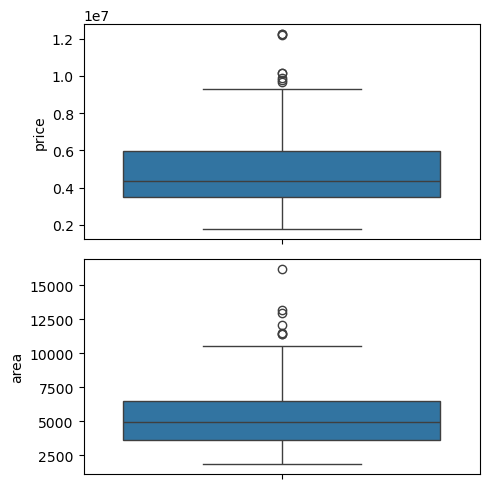

In [7]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go # and more graphs
import matplotlib.pyplot as plt # graphs
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['price'], ax = axs[0])
plt2 = sns.boxplot(df['area'], ax = axs[1])
plt.tight_layout()


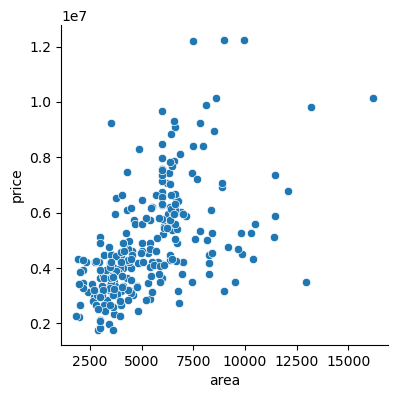

Intercept:  2340290.7249163156
Coefficient: [469.6137867]
Regression Equation: price = 2340290.7249163156 + [469.6137867] * area


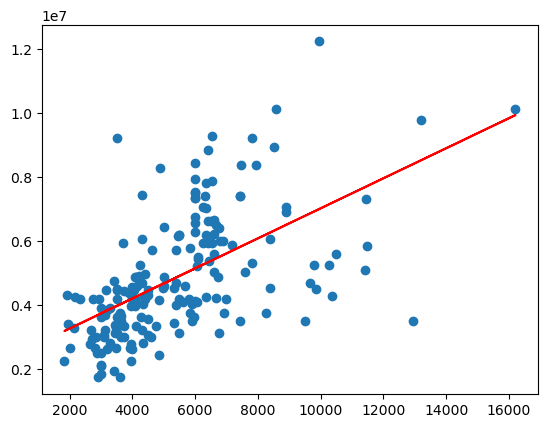

     Actual value  Predicted value
59        2345000     4.049685e+06
139       2240000     3.256038e+06
219       3234000     4.049685e+06
134       3920000     3.347612e+06
189       1820000     3.749132e+06
..            ...              ...
54        5005000     6.167643e+06
148       6790000     8.017921e+06
247       6293000     5.439742e+06
144       7210000     5.946925e+06
42        6510000     4.106039e+06

[82 rows x 2 columns]


In [6]:
sns.pairplot(df, x_vars=['area'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

x = df[['area']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
slr= LinearRegression()
slr.fit(x_train, y_train)

print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

print(f'Regression Equation: price = {slr.intercept_} + {slr.coef_} * area')

plt.scatter(x_train, y_train)
plt.plot(x_train, slr.intercept_ + slr.coef_*x_train, 'r')
plt.show()

y_pred_slr= slr.predict(x_test)
x_pred_slr= slr.predict(x_train)

slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
print(slr_diff)

In [58]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)



R squared value of the model: 32.07
Mean Absolute Error: 1260434.413834704
Mean Square Error: 3028990055597.528
Root Mean Square Error: 1740399.3954255236


## With an R squared of 32.07 we believe the model explain very little 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'
df = pd.read_csv(path+'Housing1.csv')


x = df['area']
y = df['price']

x2 = sm.add_constant(x)

est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

print(f'\n\nWith a F-statistic p-value of 1.49e-24, the model is statistical significant. However, the R-squared indicates that area only explain 32% \nof the variance in price. We will check if other variables in the dataset might be a good adition to the model.')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     128.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.49e-24
Time:                        22:57:35   Log-Likelihood:                -4271.7
No. Observations:                 272   AIC:                             8547.
Df Residuals:                     270   BIC:                             8555.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.276e+06    2.5e+05      9.115      0.0

In [ ]:
#First, we will change convert the boolean yes/no variables to 1/0 to work with them.
df = pd.get_dummies(df, columns=['furnishingstatus'])
df.replace(('yes', 'no', True, False), (1, 0, 1, 0), inplace=True)


print(df)



       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    4473000  3162         3          1        2         1          0   
1    4613000  4510         4          2        2         1          0   
2    5950000  6420         3          1        1         1          0   
3    3118850  2398         3          1        1         1          0   
4    4200000  2953         3          1        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
267  4200000  4000         4          2        2         0          0   
268  7525000  6000         3          2        4         1          0   
269  6090000  8372         3          1        3         1          0   
270  4760000  9166         2          1        1         1          0   
271  3675000  3630         2          1        1         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1      

C:\Users\pablo\AppData\Local\Temp\ipykernel_18384\4051435075.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(('yes', 'no', True, False), (1, 0, 1, 0), inplace=True)


<Axes: >

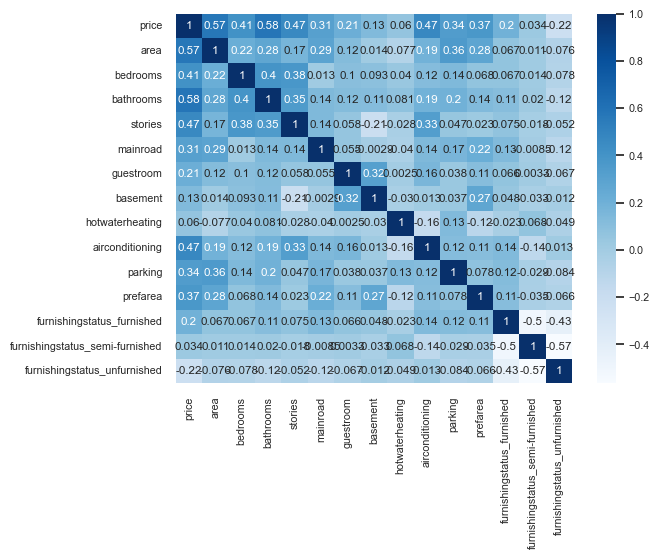

In [41]:
sns.set_theme(font_scale=0.7)
sns.heatmap(df.corr(), annot = True, cmap="Blues")

## We will pick the most correlated variables with price: bathrooms, airconditioning and stories (and area, of course)

In [45]:
y= df['price']
x= df[['area','bathrooms','airconditioning','stories']]

x2 = sm.add_constant(x)

est = sm.OLS(y, x2)
est2 = est.fit()

print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           8.22e-58
Time:                        23:14:07   Log-Likelihood:                -4186.0
No. Observations:                 272   AIC:                             8382.
Df Residuals:                     267   BIC:                             8400.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.732e+05   2.46e+05     

### Indeed, now we have the best of the two worlds: a higher R-squared (even a higher Adj. R-squared that penalizes the addition of features), with our model explaining the 63.9% of the variance of the dependent variable (price), and a low p-value for the F-statistic, meaning the entire model is significant. Even at the level of each independent variable, everyone with a low p-value for its t-test, they are statistically significant.
### Our investment strategy consists in: for a house with some defined characteristics, if the predicted price of that house is greater than its actual price, it means the house is a bargain and we should buy it. On the other hand, if we own a house and the predicted price for it is lower than the actual market price of it, the house is overpriced and we should sell it. As we expanded our model to include more features, we lost the ilustration power of two dimensions. Still, the dynamic can be summarized using our initial simple linear regression graph as follows:

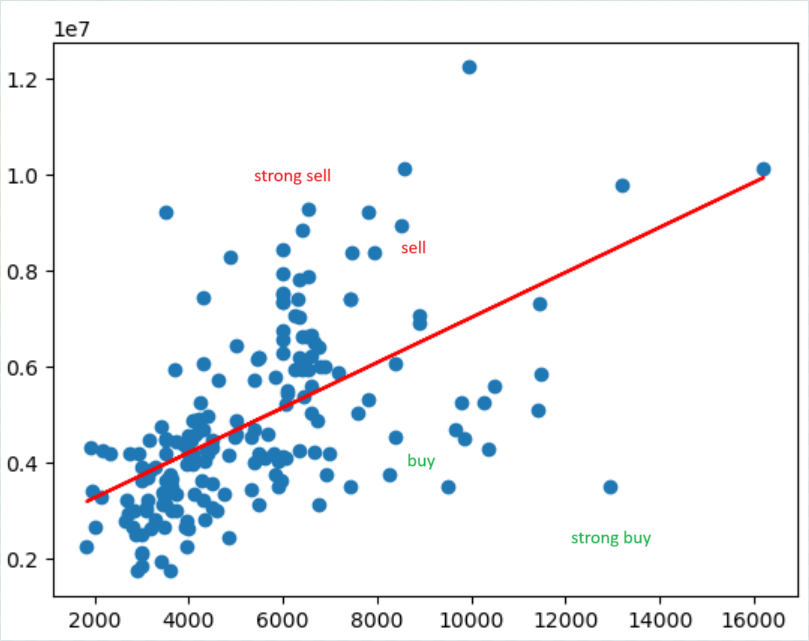